#  <center> Credit Default Analysis</center>
_Author: Michael Zaladonis_

## Contents
* [Introduction](#Introduction)
* [Import the Libraries](#Import-the-Libraries)
* [Read the data](#Read-the-data)
* [Glimpse and Clean Data](#Glimpse-and-Clean-Data)
* [Explore Data](#Explore-Data)
  * [Limit Balance](#Limit-Balance)
  * [Sex/Gender](#Sex/Gender)
  * [Age](#Age)
  * [Marriage](#Marriage)
  * [Education](#Education)
  * [Default Status](#Default-Status)
  * [Payment History](#Payment-History)
  * [Amount of Bill Statement](#Amount-of-Bill-Statement)  
  * [Amount of Previous Payment](#Amount-of-Previous-Payment)
* [Correlation Matrix](#Correlation-Matrix)
* [Variance](#Variance)
* [Covariance](#Variance)
* [References](#References)



<a id="Introduction"></a>
# Introduction
___

Credit card default is a common problem throughout the world, causing banks to lose money.  One solution to this problem is to create better models for risk analysis to identify customers who are most likely to default on their credit cards. 

[Investopedia](https://www.investopedia.com/terms/d/default2.asp)  - defines default as:
```
Default is the failure to pay interest or principal on a loan or security when due. Default occurs when a debtor is unable to meet the legal obligation of debt repayment, and it also refers to cases in which one party fails to perform on a futures contract as required by an exchange.
```
**Background**

In 2005, banks in Taiwan found themselves in a position where they had over-issued cash and credit cards to unqualified applicants. In turn, many of these borrowers ended up overusing their credit cards and were unable to meet their payments, and subsequently went into default. As they were going into default,  their loan interest was growing substantially,  causing them to have a financial and societal crisis. The goal of this report is to identify features in the data that will lead to a prediction model that will help identify risky borrowers to prevent a future credit crisis.

**Problem Statement:** Which characteristics in the data set are most likely to provide an accurate picture of a person who has a high probability of defaulting on a credit card or loan?


**Dataset Description:** 

```{r}
   ----------------------------------------------------------------------------------------
   Variable                 Description        
   -------------------- -------------------------------------------------------------------
   LIMIT_BAL            Credit Limit - Numeric

   SEX                  Gender - Categorical
                        1 = Male
                        2 = Female

   EDUCATION            Education - Categorical
                        1 = Graduate School
                        2 = University
                        3 = High school
                        4 = Others

   MARTRIAGE            Marital status - Categorical
                        1=Married
                        2=Single
                        3=Others

   AGE                  Age (years) - Numeric

   PAY_1 - PAY_6        Payment history  - Numeric
                        From April to September, 2005 as follows:
                        
                        -2 = No consumption
                        -1 = Paid in full
                        0 = Revolving credit
                        1 = 1 month delay
                        2 = 2 months delay
                        ...
                        9 = >9 Month delay

   BILL_AMT1 -BILL_AMT6 Amount of monthly statement - Numeric
                        bill_amt1 = September, 2005 
                        bill_amt2 = August, 2005
                        ...
                        bill_amt6 = April, 2005 

   PAY_AMT1 - PAY_AMT6  Amount of last payment  - Numeric
                        pay_amt1 = September, 2005
                        pay_amt2 = August, 2005
                        ...
                        pay_amt6 = April, 2005 
   ----------------------------------------------------------------------------------------
```

# Import the Libraries
___

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools


# Read the data
___

In [2]:
credit = pd.read_csv('/Users/Michael/Documents/GitHub/C5T2/data/raw/credit.csv', header =1)

# Glimpse and Clean Data
___

### Glimpse Data

Check the Shape and Columns

In [3]:
credit.shape

(30000, 25)

In [4]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Look at the data features (first 5 rows).

In [5]:
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Let's look at descriptive statistics.

In [6]:
credit.describe().round(2) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


Check for missing Data.

In [7]:
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no missing data.

### Clean Data

Drop the *ID* column

In [8]:
credit = credit.drop('ID', axis=1)
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Bin AGE into 6 age groups by decade.

In [9]:
bins = [20, 25, 35, 45, 55, 65, 100]

labels = ["20-25","25-35","35-45","45-55","55-65",">60"]
credit['AGE_BINNED'] = pd.cut(credit['AGE'], bins=bins, labels=labels)
print(credit['AGE_BINNED'].head())

0    20-25
1    25-35
2    25-35
3    35-45
4    55-65
Name: AGE_BINNED, dtype: category
Categories (6, object): [20-25 < 25-35 < 35-45 < 45-55 < 55-65 < >60]


Bin LIMIT_BAL into 4 groups, using a base of 1000.

In [10]:
bins = [10000,25000,50000,100000,1000000]

labels = ["10-25","25-50","50-100", ">100"]
credit['LIMIT_BAL_BINNED'] = pd.cut(credit['LIMIT_BAL'], bins=bins, labels=labels)

print(credit['LIMIT_BAL_BINNED'].head())

0     10-25
1      >100
2    50-100
3     25-50
4     25-50
Name: LIMIT_BAL_BINNED, dtype: category
Categories (4, object): [10-25 < 25-50 < 50-100 < >100]



Rename the column "default payment next month" for ease of use. 


In [11]:
credit["DEFAULTING"] = credit["default payment next month"]

Clean up *Education*, by combining the four _other_ values into a single _other_ column.

In [12]:
credit['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

Rename PAY_0 to PAY_2, so that it is sequential.

In [13]:
credit['PAY_1']= credit["PAY_0"]

credit['PAY_1'].head()

0    2
1   -1
2    0
3    0
4   -1
Name: PAY_1, dtype: int64


Convert all of categorical features from thier current datatype to categorical data. This will allow us to explorer the data a bit better.


In [14]:
col_names = ["SEX","EDUCATION","MARRIAGE", "DEFAULTING"]

# loop to change each column to category type
for col in col_names:
    credit[col + "_cat"] = credit[col].astype('category',copy=True)

cat_dytpes = credit.select_dtypes(exclude=["number","bool_","object_"])

print(cat_dytpes.dtypes)
credit.describe(exclude=[np.number])

AGE_BINNED          category
LIMIT_BAL_BINNED    category
SEX_cat             category
EDUCATION_cat       category
MARRIAGE_cat        category
DEFAULTING_cat      category
dtype: object


,AGE_BINNED,LIMIT_BAL_BINNED,SEX_cat,EDUCATION_cat,MARRIAGE_cat,DEFAULTING_cat
count,30000,29507,30000,30000,30000,30000
unique,6,4,2,4,4,2
top,25-35,>100,2,2,2,0
freq,12938,17502,18112,14030,15964,23364


<a id="data_exploration"></a>
# Explore Data
___

Since we know that we are looking for patterns in the data that will show who is likely to have a DEFAULTING 1, we will explore the features in reference to DEFAULTING.

In [15]:
credit.groupby(['DEFAULTING']).sum()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_1
DEFAULTING,,,,,,,,,,,,,,,,,,,,,
0,4161122000,37713,42729,36416,827489,-4935,-7054,-7389,-8309,-9100,...,946953325,912183566,147364630,155147826,134424700,123841567,122619419,133627402,0,-4935
1,863407680,10399,12539,10140,237076,4434,3041,2403,1689,1114,...,262388704,253969246,22542785,22487079,22345745,20940739,21362210,22837675,6636,4434


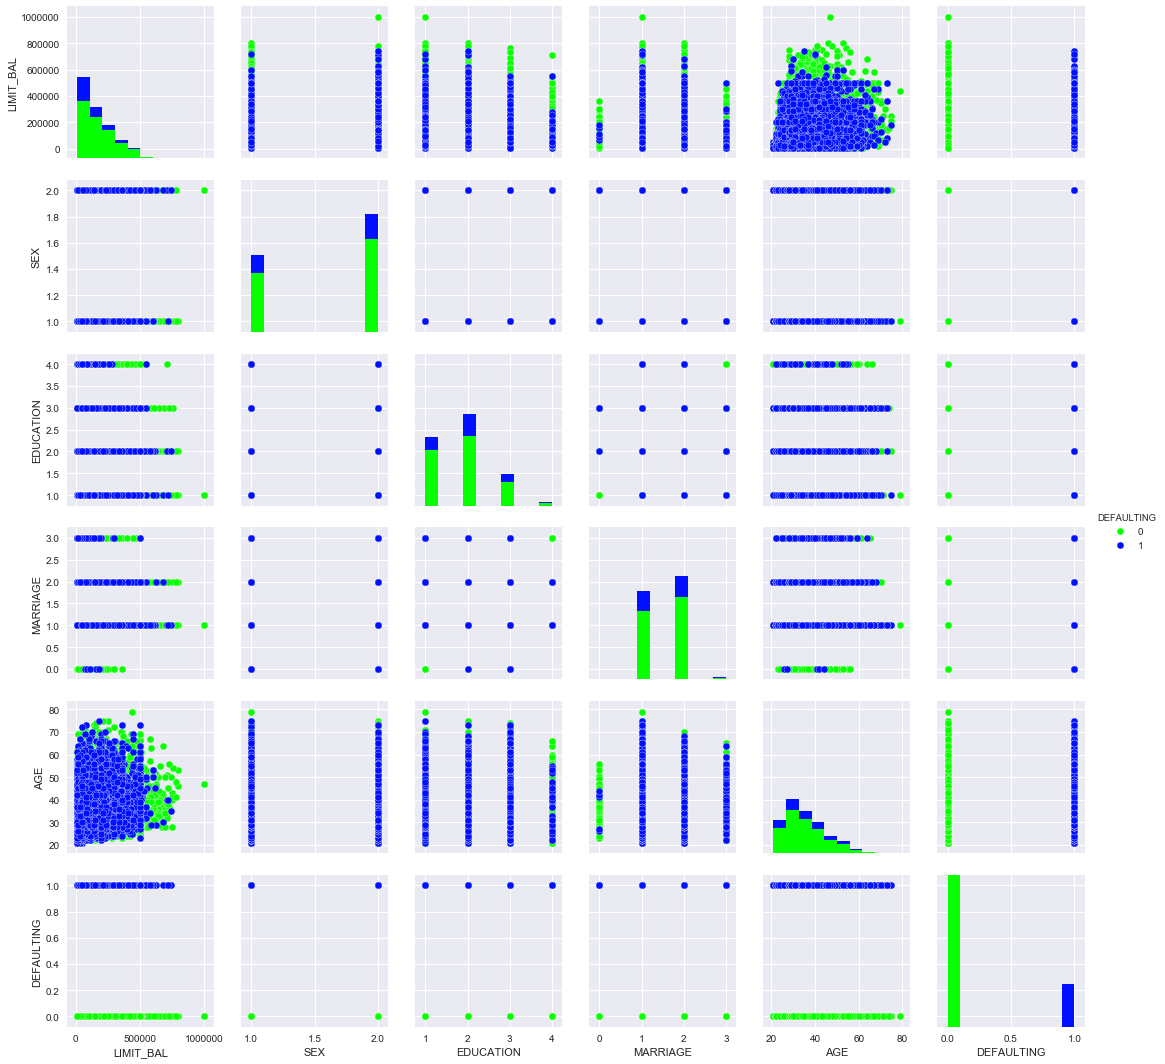

In [16]:
cols = [ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', "DEFAULTING"]
ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")
sns.color_palette("hsv", 10)
sns.set()
sns.pairplot(credit[cols], hue="DEFAULTING", palette="hsv")
plt.show();


We will explore the categorical values and relationship with DEFAULTING.


Distribution of categorial features to see the segmentation of people who are defaulting on thier loans/creditcards. 

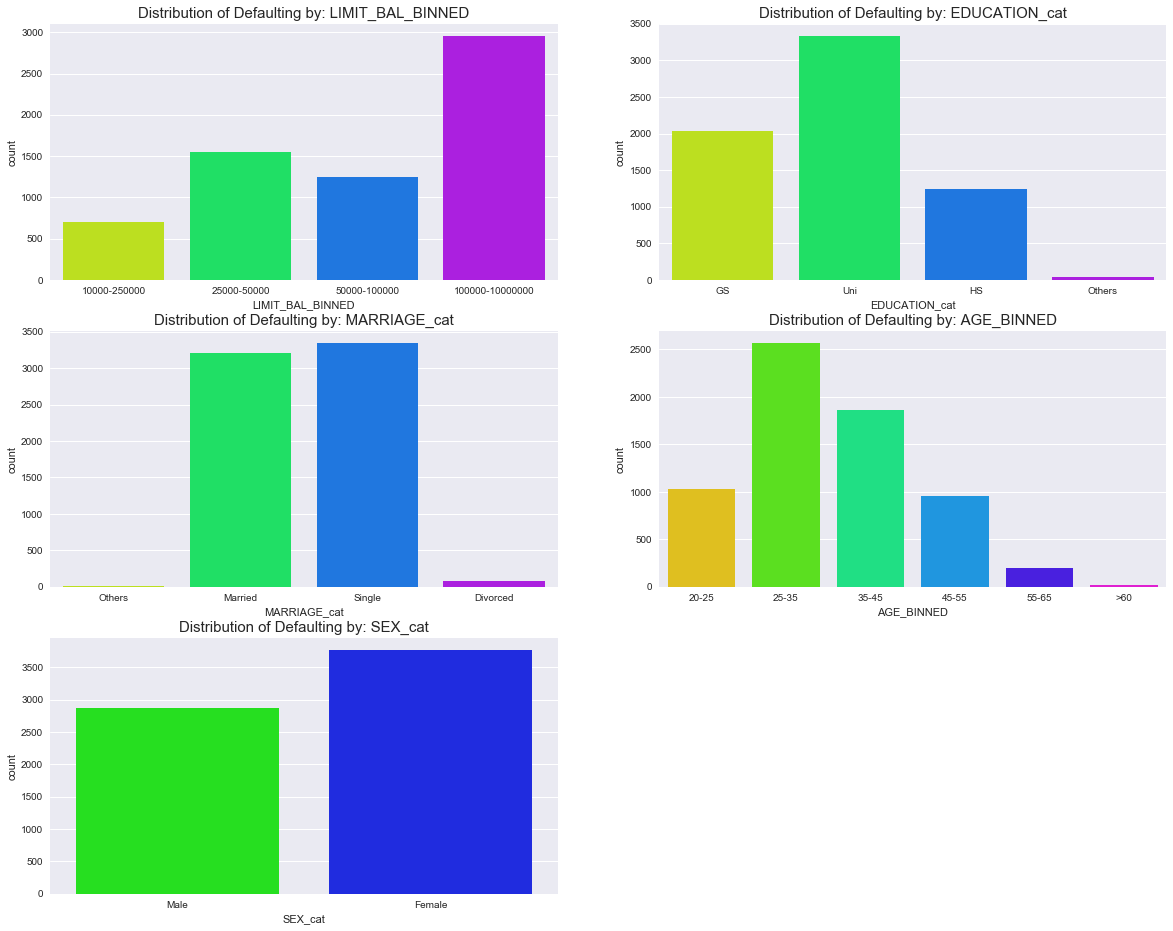

In [17]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat','MARRIAGE_cat', 'AGE_BINNED', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]
ax = plt.figure(figsize=(20,16))
ax.set_facecolor("white")
labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["GS", "Uni", "HS","Others"],["Others", "Married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male","Female"]
]
x = credit.loc[credit['DEFAULTING'] == 1]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(3,2,j+1)

    pp = sns.countplot(x=i,  data=x,  palette = 'hsv')
    pp.set_xticklabels(labels[j])
    plt.title('Distribution of Defaulting by: ' + i, size=15)

#     lgnd = pp.legend(labels[j])

plt.show()


# Explore Data
----

<a id="Balance"></a>
## Limit Balance

Explore Limit Balance and Default Rate Distribution

In [18]:
credit.groupby(['LIMIT_BAL_BINNED'])["DEFAULTING"].sum()

LIMIT_BAL_BINNED
10-25      698
25-50     1545
50-100    1244
>100      2952
Name: DEFAULTING, dtype: int64

Text(0.5,1.05,'Limit Balance and Default Rate Distribution')

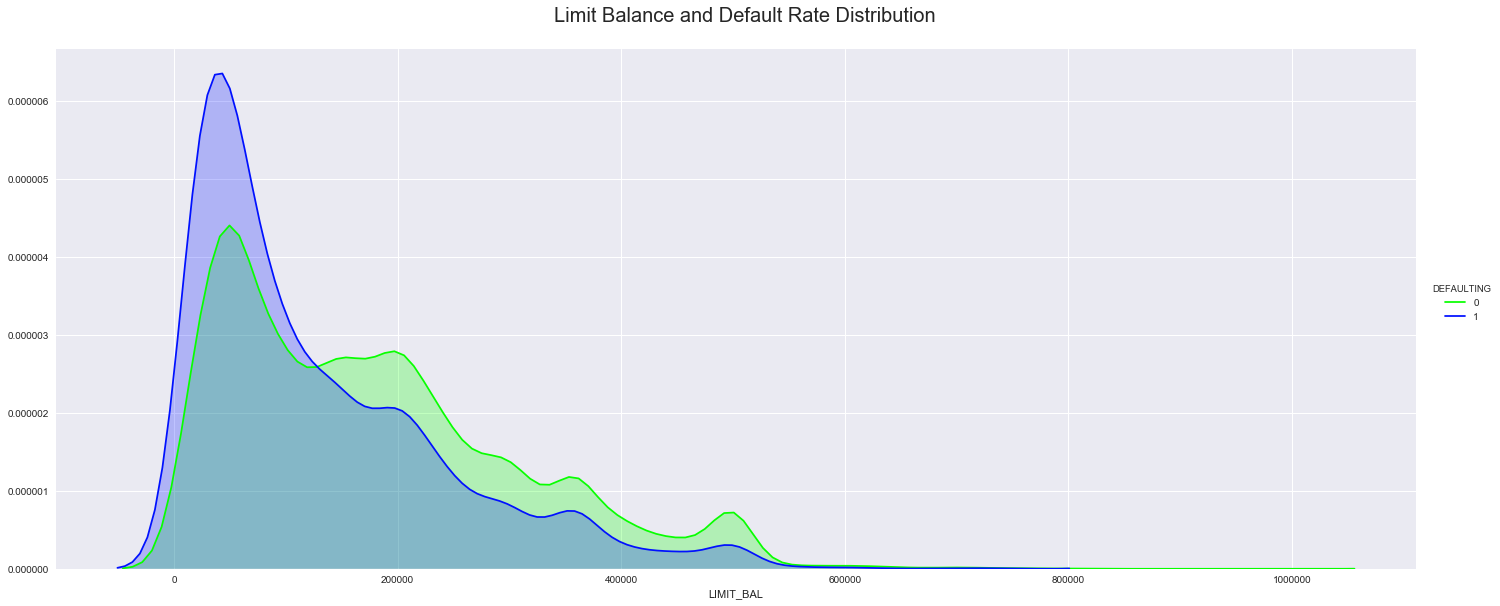

In [19]:
ax = plt.figure(figsize=(20, 14))
ax.set_facecolor("white")
pp = sns.FacetGrid(credit, hue = 'DEFAULTING', aspect = 2.5, size = 8, palette = 'hsv')
pp.map(sns.kdeplot, 'LIMIT_BAL', shade = True, legend=True)
pp.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

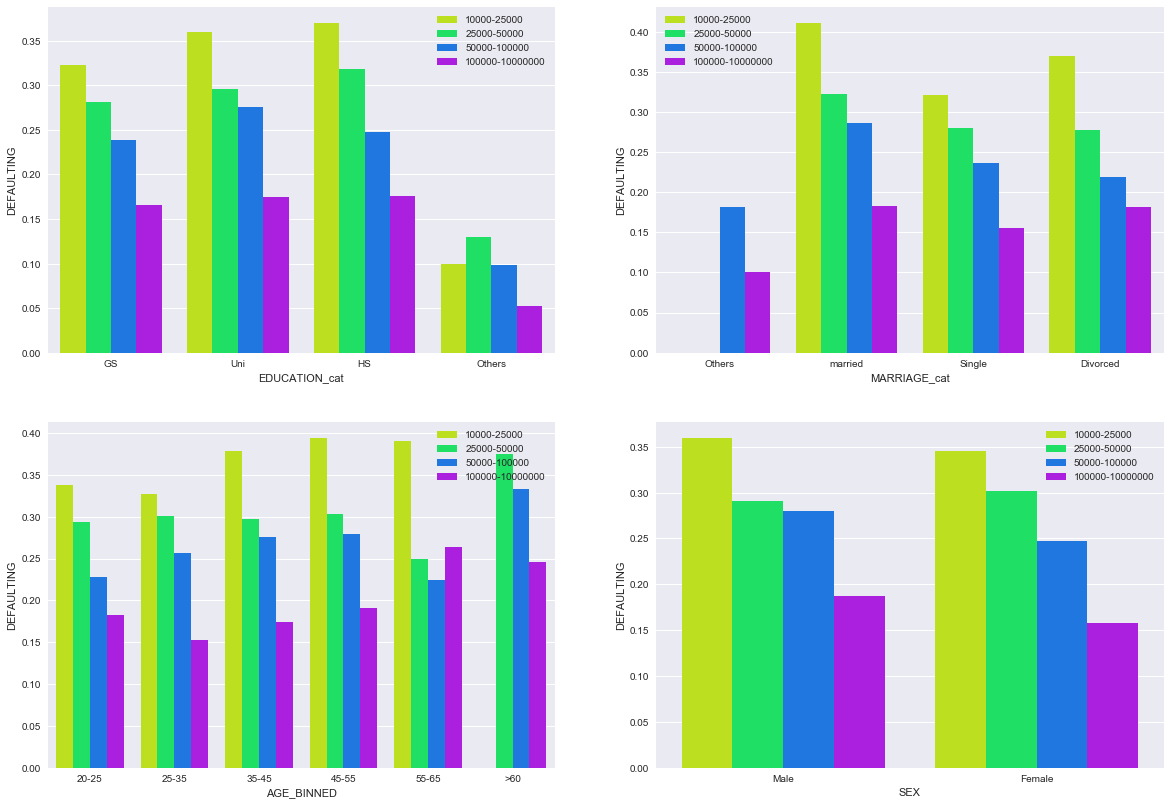

In [20]:
colsx = ['EDUCATION_cat', 'MARRIAGE_cat', 'AGE_BINNED', 'SEX']
length = len(colsx)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["GS", "Uni", "HS","Others"],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male", "Female"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(2,2,j+1)
    pp = sns.barplot(x=i , y="DEFAULTING",hue="LIMIT_BAL_BINNED", data=credit, ci=None, palette='hsv')
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(["10000-25000","25000-50000","50000-100000", "100000-10000000"])

plt.show()


<a id="sex"></a>
## Sex/Gender

Explore Sex/Gender and Default Rate Distribution

In [21]:
credit.groupby(['SEX_cat'])["DEFAULTING"].sum()

SEX_cat
1    2873
2    3763
Name: DEFAULTING, dtype: int64

In [22]:
credit.SEX.unique()

array([2, 1])

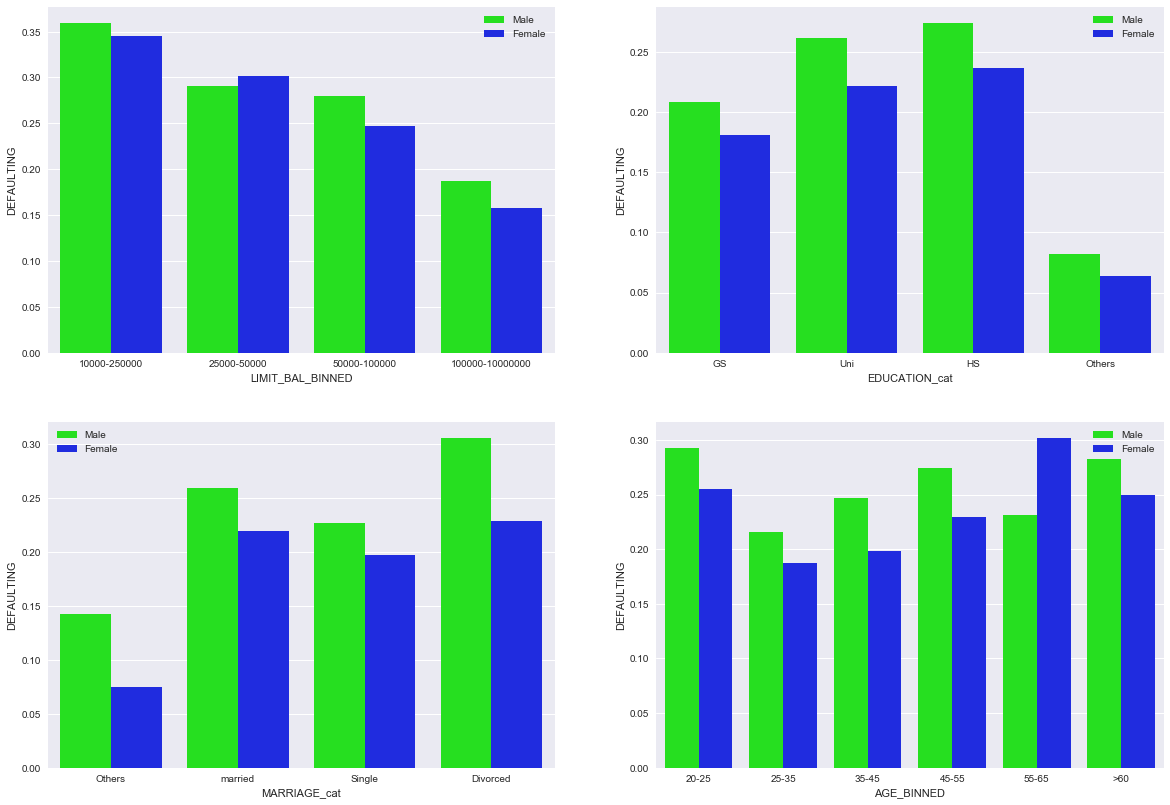

In [23]:
colsx = ["LIMIT_BAL_BINNED", 'EDUCATION_cat', 'MARRIAGE_cat', 'AGE_BINNED']
length = len(colsx)
cs = ["r", "b", "g", "k"]

ax = plt.figure(figsize=(20, 14))
ax.set_facecolor("white")

labels = [
    ["10000-250000", "25000-50000", "50000-100000", "100000-10000000"],
    ["GS", "Uni", "HS","Others"], ["Others", "married", "Single", "Divorced"],
    ["20-25", "25-35", "35-45", "45-55", "55-65", ">60"]
]

for i, j in itertools.zip_longest(colsx, range(length)):
    plt.subplot(2, 2, j + 1)
    pp = sns.barplot(x=i, y="DEFAULTING", hue="SEX", data=credit, ci=None, palette='hsv')
    pp.set_xticklabels(labels[j])
    
    lgnd = pp.legend(['Male', 'Female'])

plt.show()


<a id="Age"></a>
## Age

Explore Age and Default Rate Distribution

In [24]:
credit.groupby(['AGE_BINNED'])["DEFAULTING"].sum()

AGE_BINNED
20-25    1032
25-35    2565
35-45    1861
45-55     954
55-65     201
>60        23
Name: DEFAULTING, dtype: int64

In [25]:
credit.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

Text(0.5,1.05,'AGE and Default Rate Distribution')

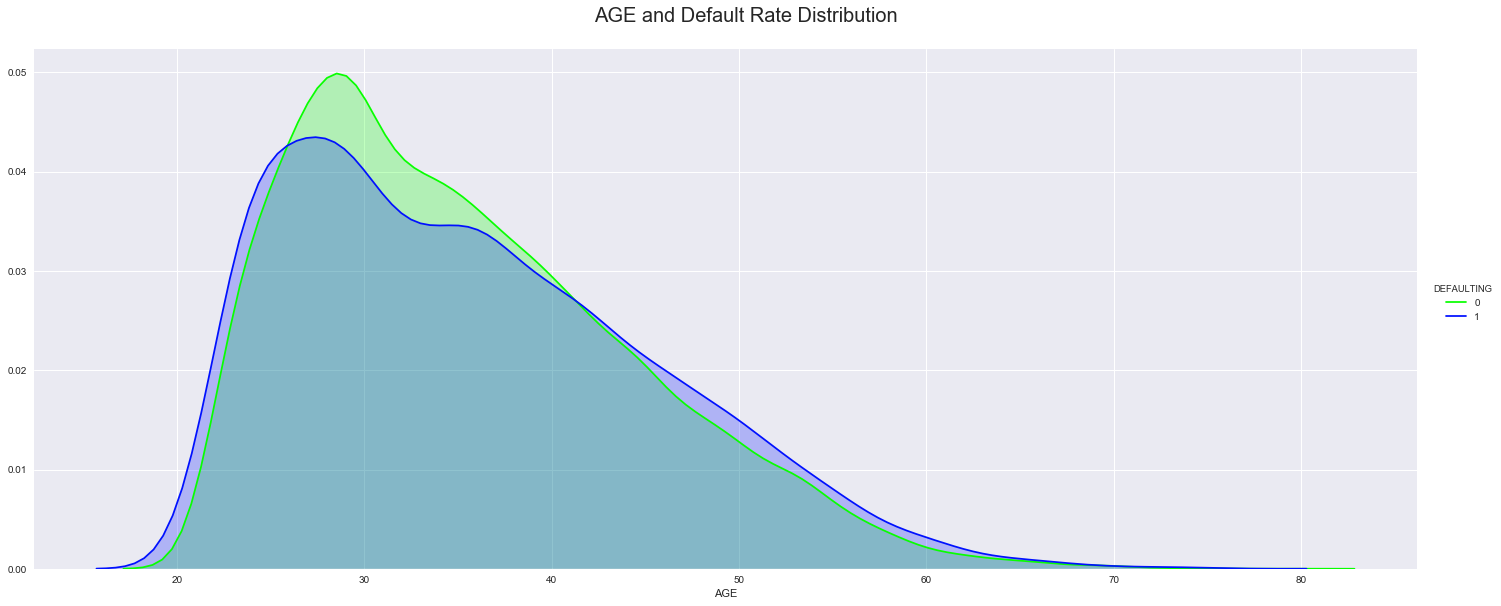

In [26]:
pp = sns.FacetGrid(credit, hue = 'DEFAULTING', aspect = 2.5, size = 8, palette = 'hsv')
pp.map(sns.kdeplot, 'AGE', shade = True)
pp.add_legend()
plt.suptitle('AGE and Default Rate Distribution', fontsize = 20, y = 1.05)

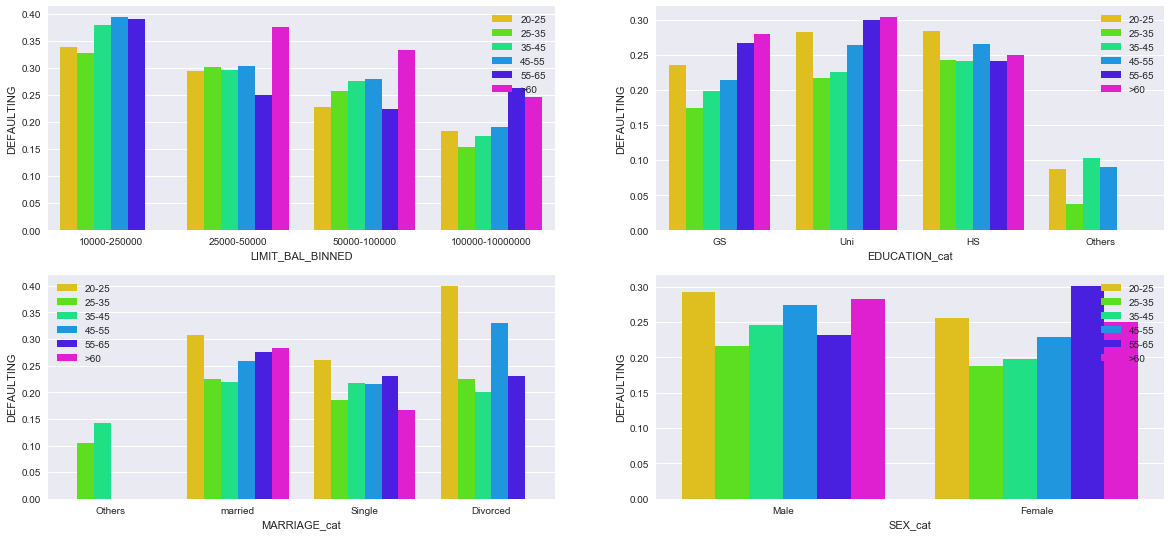

In [27]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat', 'MARRIAGE_cat', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["GS", "Uni", "HS","Others"],["Others", "married","Single", "Divorced"], 
    ["Male", "Female"] , ["20-25","25-35","35-45","45-55","55-65",">60"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(3,2,j+1)
    pp = sns.barplot(x=i , y="DEFAULTING",hue="AGE_BINNED", data=credit, ci=None, palette='hsv')
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(["20-25","25-35","35-45","45-55","55-65",">60"])
plt.show()

<a id="MARRIAGE"></a>
## Marriage

Explore Marriage and Default Rate Distribution

In [28]:
credit.groupby(['MARRIAGE_cat'])["DEFAULTING"].sum()

MARRIAGE_cat
0       5
1    3206
2    3341
3      84
Name: DEFAULTING, dtype: int64

In [29]:
credit["MARRIAGE_cat"].describe()

count     30000
unique        4
top           2
freq      15964
Name: MARRIAGE_cat, dtype: int64

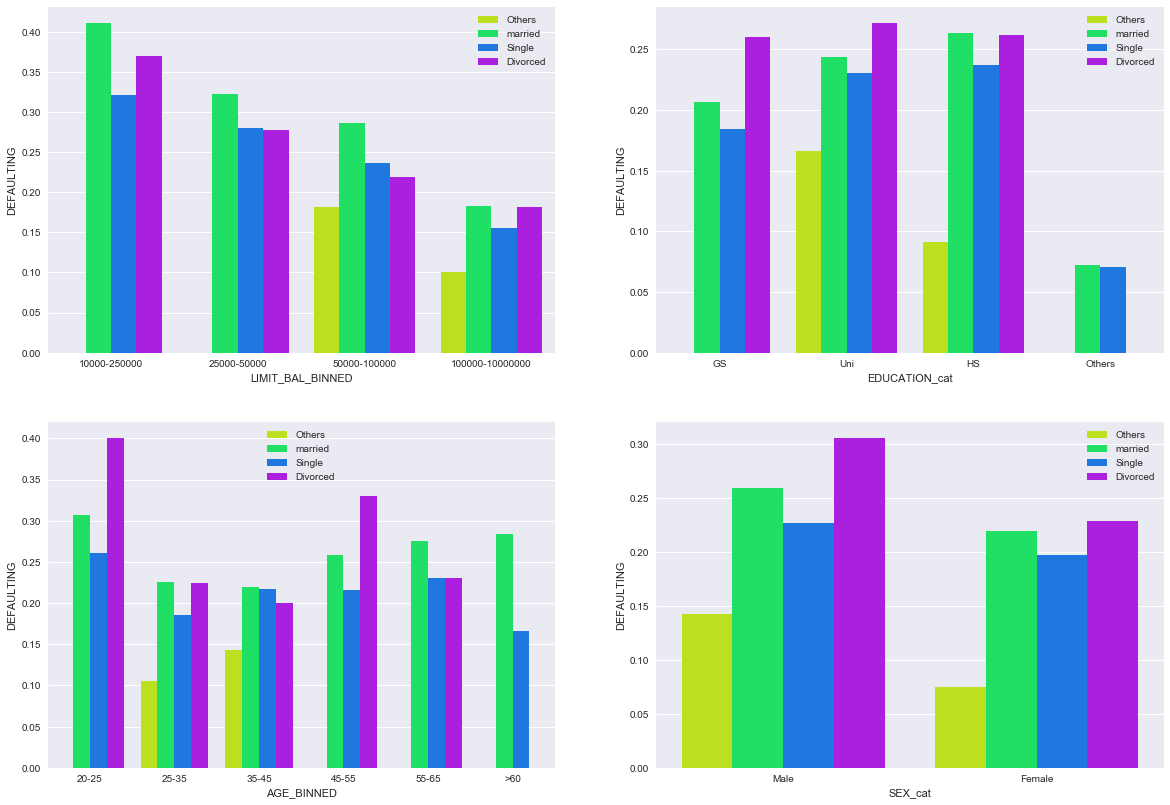

In [30]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat', 'AGE_BINNED', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["GS", "Uni", "HS","Others"
                                                                      ],["20-25","25-35","35-45","45-55","55-65",">60"],["Male", "Female"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(2,2,j+1)
    pp = sns.barplot(x=i , y="DEFAULTING",hue="MARRIAGE_cat", data=credit, ci=None, palette='hsv')
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(["Others", "married","Single", "Divorced"])

plt.show()


<a id="EDUCATION"></a>
## Education

Explore Education and Default Rate Distribution

In [31]:
credit.groupby(['EDUCATION_cat'])["DEFAULTING"].sum()

EDUCATION_cat
1    2036
2    3330
3    1237
4      33
Name: DEFAULTING, dtype: int64

In [32]:
credit["EDUCATION"].describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

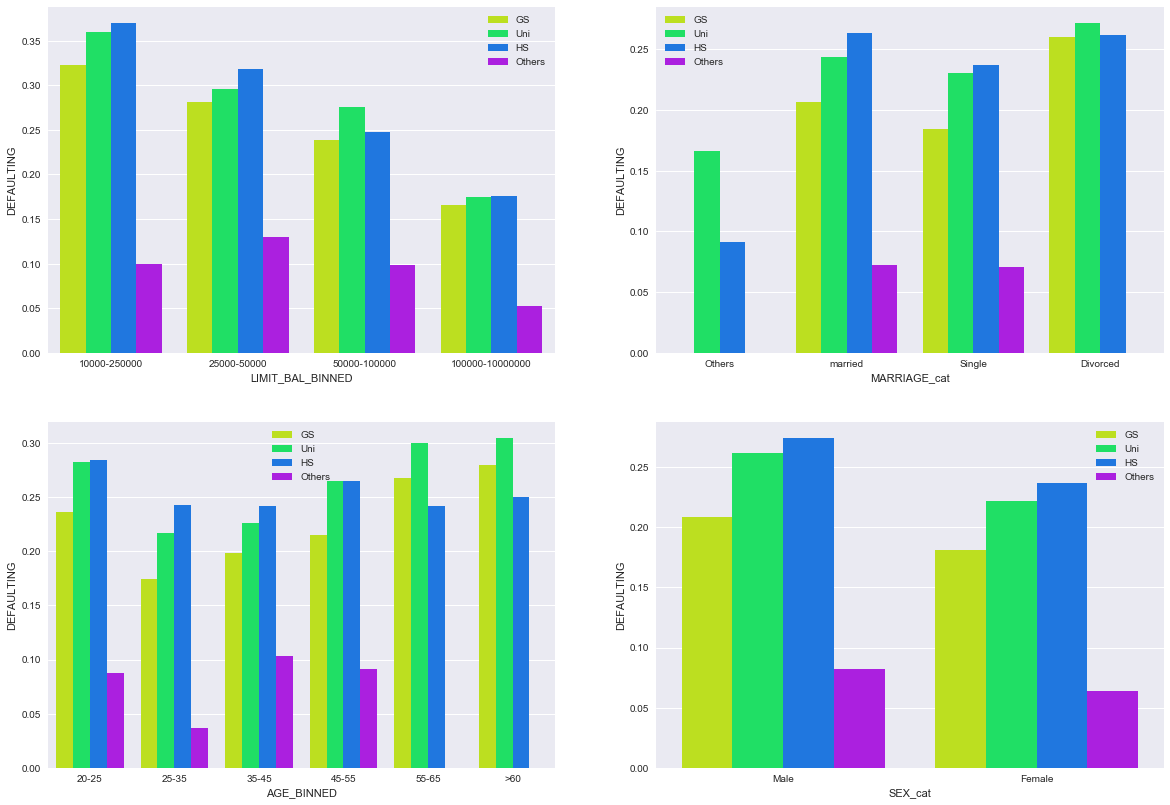

In [33]:
colsx = [ "LIMIT_BAL_BINNED", 'MARRIAGE_cat', 'AGE_BINNED', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male", "Female"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(2,2,j+1) 
    pp = sns.barplot(x=i , y="DEFAULTING",hue="EDUCATION_cat", data=credit,ci=None, palette='hsv')
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(["GS", "Uni", "HS","Others" ])

plt.show()


<a id="DEFAULTING"></a>
## Default Status

Explore Default Rate Distribution

In [34]:
credit["DEFAULTING"].describe().round(1) 

count    30000.0
mean         0.2
std          0.4
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          1.0
Name: DEFAULTING, dtype: float64

DEFAULTING accounts for 22.12% of 30000 the observations


[Text(0,0,'Not Defaulting'), Text(0,0,'Defaulting')]

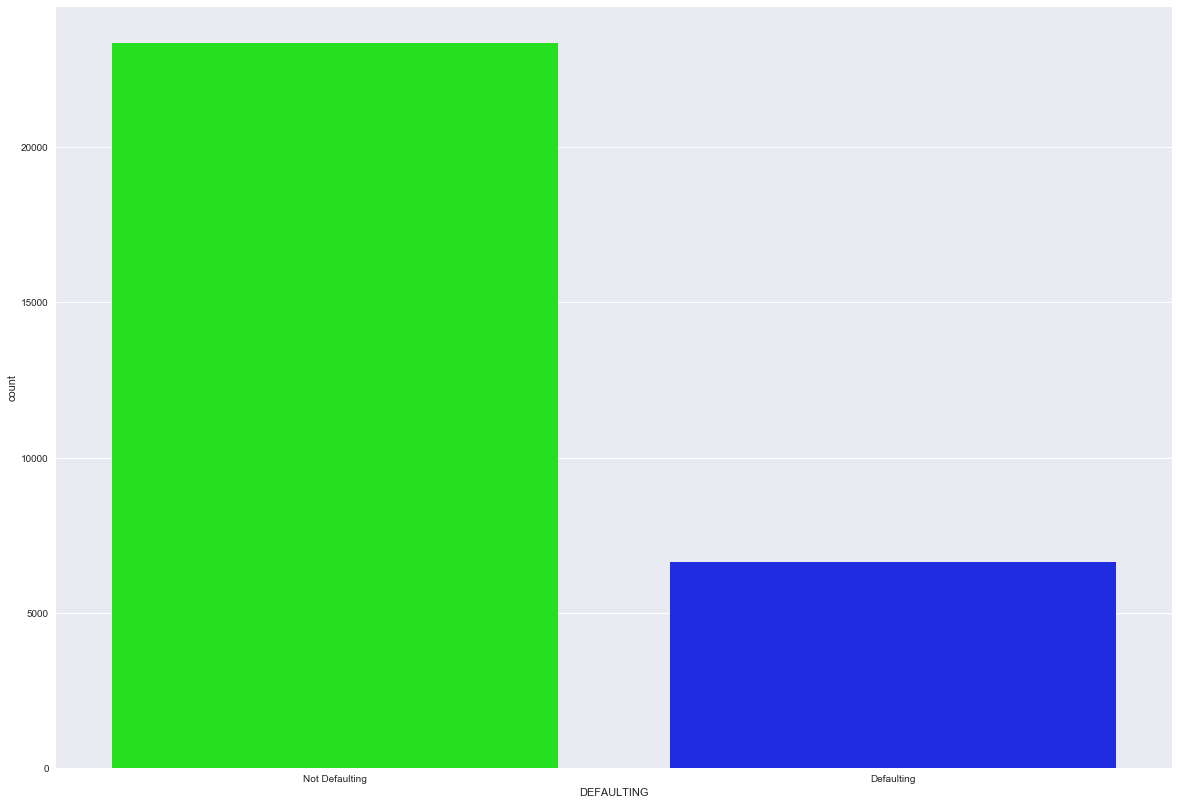

In [35]:
ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")
d = credit.groupby(['DEFAULTING']).size()

print("DEFAULTING accounts for {}% of {} the observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
pp = sns.countplot( x="DEFAULTING", data=credit,  palette='hsv')
pp.set_xticklabels(['Not Defaulting', 'Defaulting'])


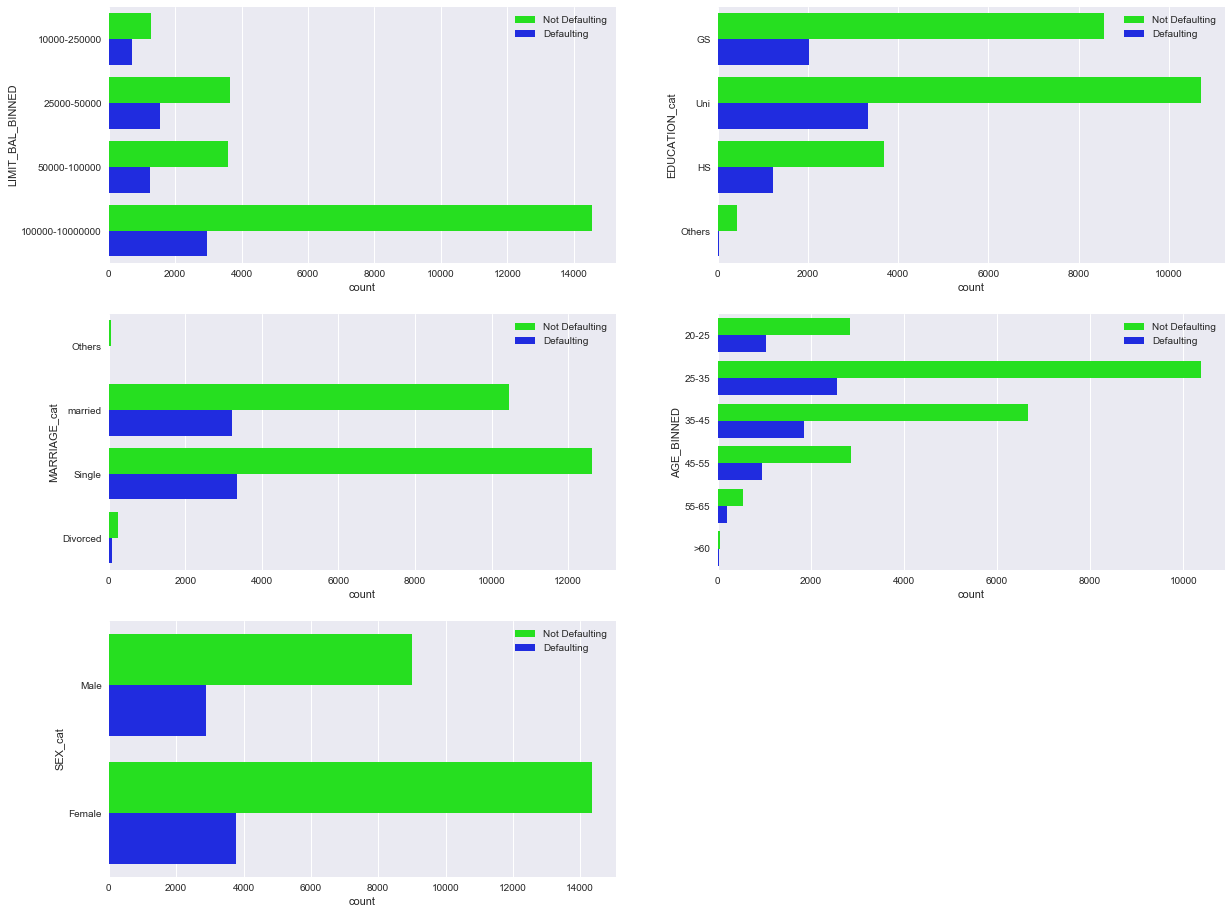

In [36]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat','MARRIAGE_cat', 'AGE_BINNED', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,16))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["GS", "Uni", "HS","Others"],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male","Female"]
]
for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(3,2,j+1)
#     pp = sns.barplot(x=i , y="DEFAULTING",hue="MARRIAGE_cat", data=credit);
    pp = sns.countplot(y=i , hue="DEFAULTING", data=credit,  palette='hsv')
    pp.set_yticklabels(labels[j])
    lgnd = pp.legend(['Not Defaulting', 'Defaulting'])
    
plt.show()


<a id="past"></a>
## Payment History

Explore Payment History and Default Rate Distribution

In [37]:
ccc = credit.iloc[:,5:11]
ccc.describe().round(2) 

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29
std,1.12,1.20,1.20,1.17,1.13,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [38]:
credit["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

Distribution of Monthly Payment Codes by people who will go into default in the following month.

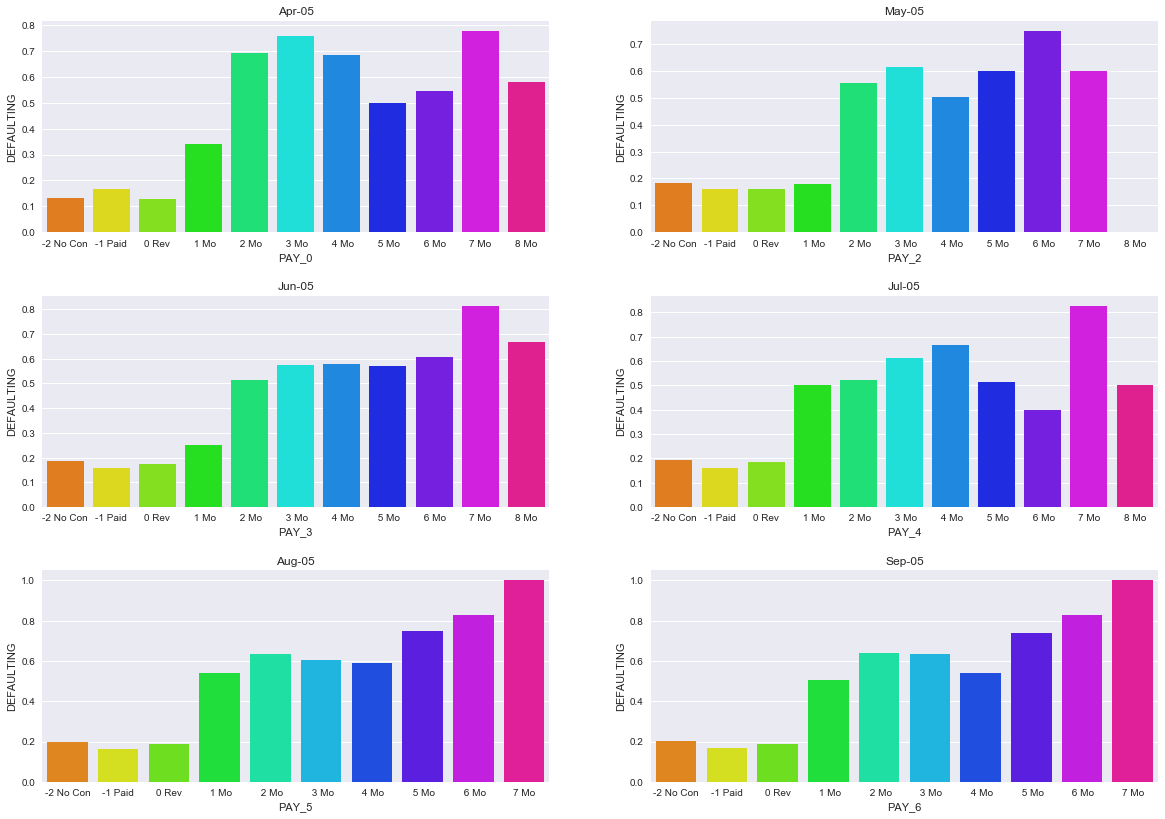

In [39]:
pay_cols = [ "PAY_0",	"PAY_2",	"PAY_3"	, "PAY_4" ,	"PAY_5" ,"PAY_6"]
months = ["Apr-05","May-05","Jun-05","Jul-05","Aug-05","Sep-05"]
lookUps = ["-2 No Con","-1 Paid","0 Rev"," 1 Mo"," 2 Mo"," 3 Mo"," 4 Mo"," 5 Mo"," 6 Mo","7 Mo","8 Mo","9 Mo","+10 Mo"]
lookUps2 = ["1 Mo"," 2 Mo "," 3 Mo "," 4 Mo "," 5 Mo "," 6 Mo "," 7 Mo "," 8 Mo "," 9 Mo "," +10 Mo"]
labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "GS", "Uni", "HS","Others","Others","Others" ],["Others", "married","Single", "Divorced"], 
    ["Male", "Female"] , ["20-25","25-35","35-45","45-55","55-65",">60"]
]
length = len(pay_cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

for i,j in itertools.zip_longest(pay_cols,range(length)):
    plt.subplot(3,2,j+1)
    plt.title(months[j])
    credit[i] = credit[i].astype(int)

    pp = sns.barplot(x=i , y="DEFAULTING", data=credit, ci=None, palette='hsv')
    pp.set_xticklabels(lookUps)
    plt.subplots_adjust(hspace = .3)
#     lgnd = pp.legend(["20-25","25-35","35-45","45-55","55-65",">60"])
plt.show()

<a id="bill"></a>
## Amount of Bill Statement

Distribution of what people owe on thier loans/creditcards from month to month. 

In [40]:
bills = credit.iloc[:,11:17]
bills.describe().round(2) 

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76
std,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11
min,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
25%,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00
50%,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00
75%,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25
max,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00


Average of what people who are going to default owe each month on thier creditcards each month. 

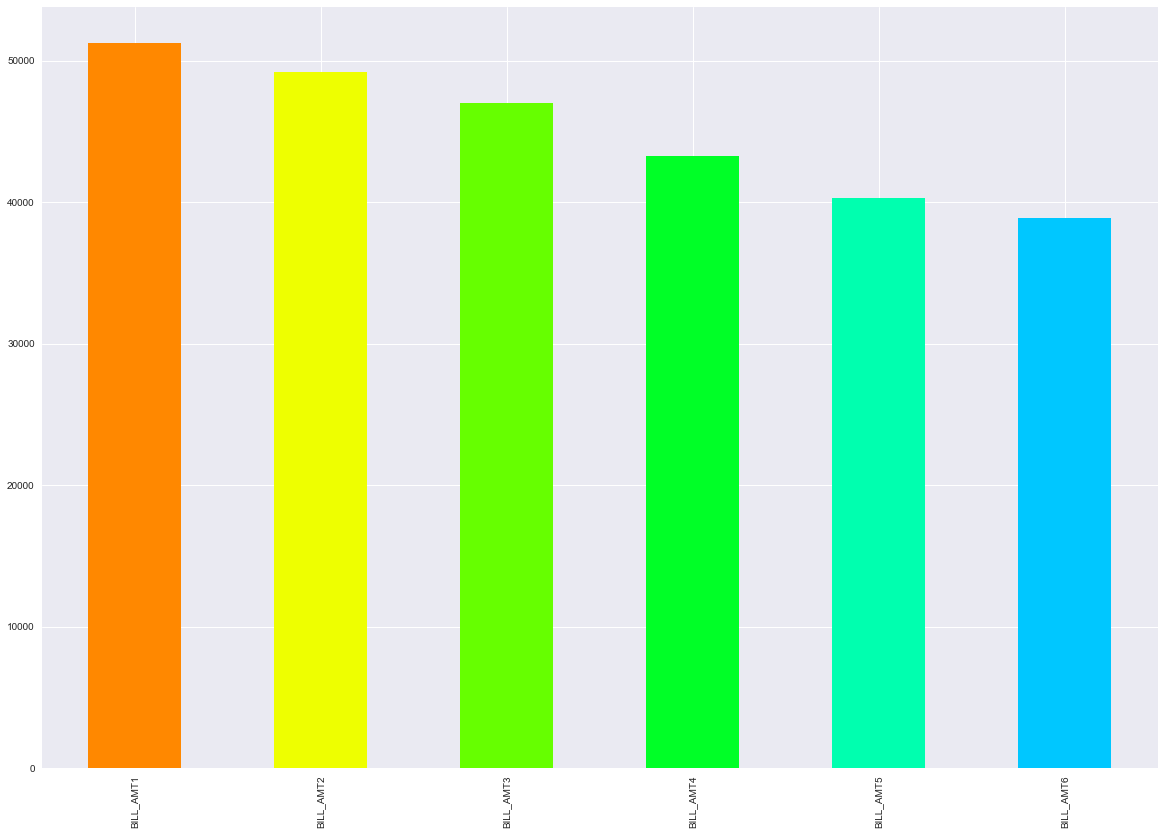

In [41]:
pay_cols = [ "PAY_1",	"PAY_2",	"PAY_3"	, "PAY_4" ,	"PAY_5" ,"PAY_6"]
bill_cols = [ "BILL_AMT1",	"BILL_AMT2", "BILL_AMT3", "BILL_AMT4" ,	"BILL_AMT5" ,"BILL_AMT6"]

months = ["Apr-05","May-05","Jun-05","Jul-05","Aug-05","Sep-05"]
lookUps = ["-2 No Con","-1 Paid","0 Rev"," 1 Mo"," 2 Mo"," 3 Mo"," 4 Mo"," 5 Mo"," 6 Mo","7 Mo","8 Mo","9 Mo","+10 Mo"]
lookUps2 = ["1 Mo"," 2 Mo "," 3 Mo "," 4 Mo "," 5 Mo "," 6 Mo "," 7 Mo "," 8 Mo "," 9 Mo "," +10 Mo"]
tempMat = pd.concat([bills, credit["DEFAULTING"]], axis=1)

ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")


bills.mean().plot(kind='bar',color=sns.color_palette('hsv',10))


<a id="payment"></a>
## Amount of Previous Payment

Explore Payment History and Default Rate Distribution

In [42]:
prev_pay = credit.iloc[:,17:23]
prev_pay.describe().round(2) 

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50
std,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1000.00,833.00,390.00,296.00,252.50,117.75
50%,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00
max,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00


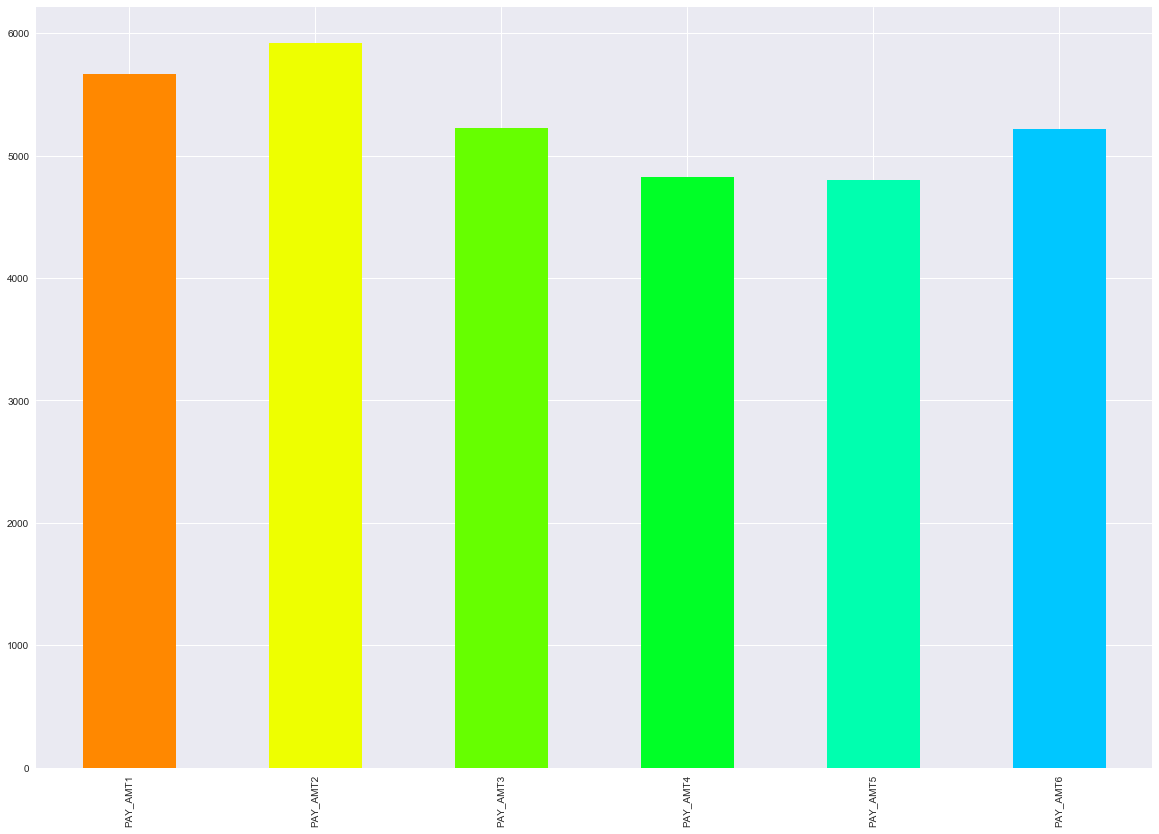

In [43]:
ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

prev_pay.mean().plot(kind='bar',color=sns.color_palette('hsv',10) )

<a id="Matrix"></a>

# Correlation Matrix

In [44]:
corr_mat = credit.corr()
print(corr_mat.head())

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.231088 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.013627 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.231088  0.013627   1.000000 -0.149134  0.182434  0.112593   
MARRIAGE   -0.108139 -0.031389  -0.149134  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.182434 -0.414170  1.000000 -0.039447   

              PAY_2     PAY_3     PAY_4     PAY_5    ...     BILL_AMT6  \
LIMIT_BAL -0.296382 -0.286123 -0.267460 -0.249411    ...      0.290389   
SEX       -0.070771 -0.066096 -0.060173 -0.055064    ...     -0.016733   
EDUCATION  0.129703  0.122425  0.116531  0.104088    ...     -0.012646   
MARRIAGE   0.024199  0.032688  0.033122  0.035629    ...     -0.021207   
AGE       -0.050148 -0.053048 -0.049722 -0.053826    ...      0.047613   

           PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
LIMIT_BAL  0.195236  0.178408  

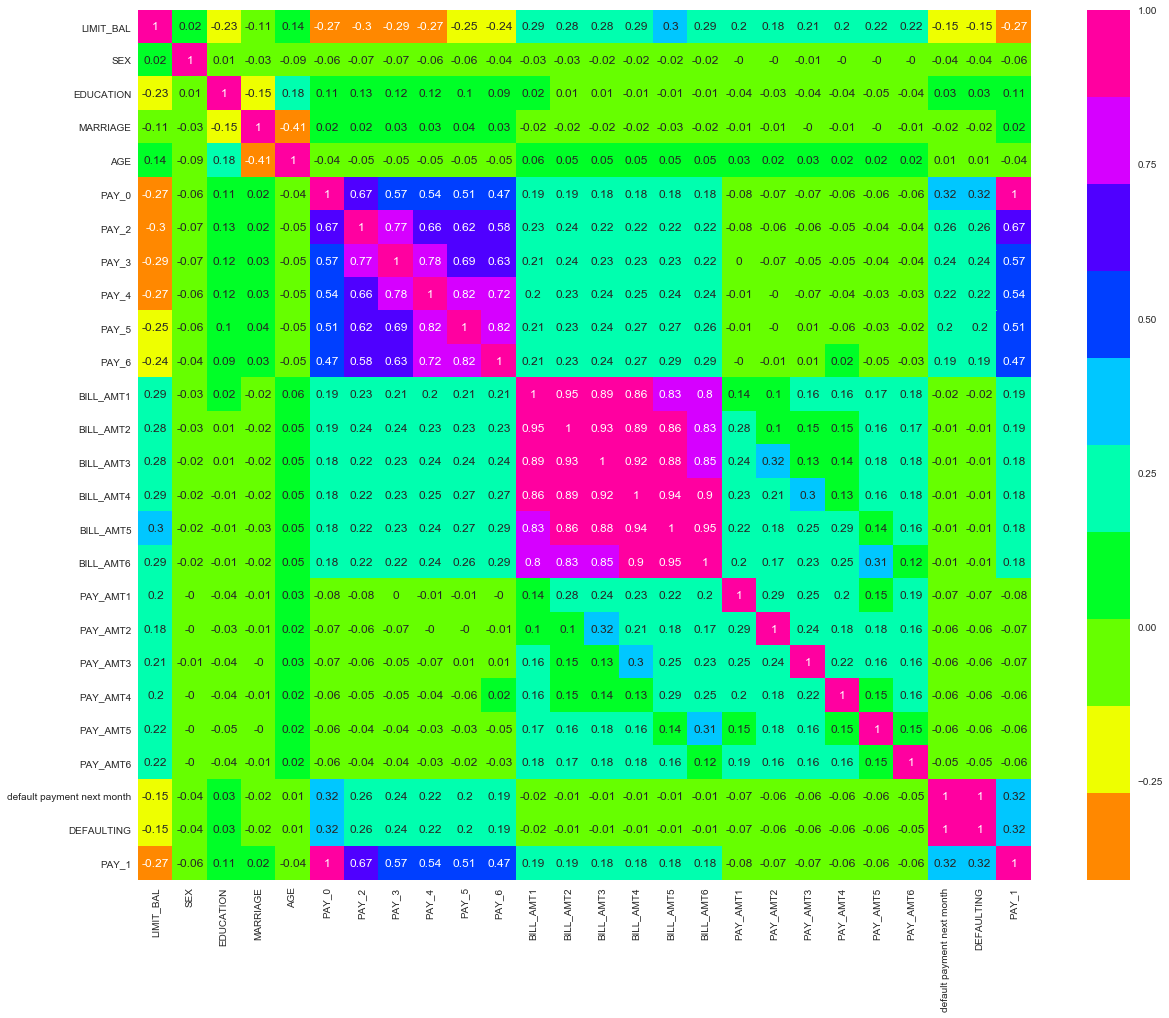

In [45]:
plt.figure(figsize=(20,16))
cor = round(credit.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('hsv', 10), annot = True)

<a id="Variance"></a>
# Variance

In [46]:
covMat = credit.var()
print(covMat)

LIMIT_BAL                     1.683446e+10
SEX                           2.392474e-01
EDUCATION                     5.542720e-01
MARRIAGE                      2.724523e-01
AGE                           8.496976e+01
PAY_0                         1.262930e+00
PAY_2                         1.433254e+00
PAY_3                         1.432492e+00
PAY_4                         1.366885e+00
PAY_5                         1.284114e+00
PAY_6                         1.322472e+00
BILL_AMT1                     5.422240e+09
BILL_AMT2                     5.065705e+09
BILL_AMT3                     4.809338e+09
BILL_AMT4                     4.138716e+09
BILL_AMT5                     3.696294e+09
BILL_AMT6                     3.546692e+09
PAY_AMT1                      2.743423e+08
PAY_AMT2                      5.308817e+08
PAY_AMT3                      3.100051e+08
PAY_AMT4                      2.454286e+08
PAY_AMT5                      2.334266e+08
PAY_AMT6                      3.160383e+08
default pay

<a id="Covariance"></a>
# Covariance

In [47]:
covMat = credit.cov().head()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22322.227579 -7323.669658   
SEX        1.571051e+03     0.239247      0.004962    -0.008014   
EDUCATION -2.232223e+04     0.004962      0.554272    -0.057954   
MARRIAGE  -7.323670e+03    -0.008014     -0.057954     0.272452   
AGE        1.730767e+05    -0.409726      1.251988    -1.992764   

                     AGE         PAY_0         PAY_2         PAY_3  \
LIMIT_BAL  173076.722569 -39545.930009 -46037.648360 -44432.253315   
SEX            -0.409726     -0.031685     -0.041442     -0.038694   
EDUCATION       1.251988      0.094202      0.115604      0.109088   
MARRIAGE       -1.992764      0.011683      0.015122      0.020421   
AGE            84.969755     -0.408639     -0.553408     -0.585263   

                  PAY_4         PAY_5      ...          BILL_AMT6  \
LIMIT_BAL -40571.811859 -36670.562325      ...       2.243837e+09   
SEX           -0.034411     -0.030521 

<a id="References"></a>
# References
___

1. https://www.kaggle.com/pavanraj159/loan-repayers-v-s-loan-defaulters-home-credit
2. https://www.kaggle.com/harunshimanto/introduction-home-credit-default-risk
3. [Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.]()

